# 7. 지도 그래프 
# 지역(서울, 경기, 대구, 경북), 6월 30일 기준, 누적확진자의 집단감염 여부 비율 (바그래프)
# 집단 감염의 비율 %수
# 집단 감염이 얼마나 큰 영향을 끼쳤는지 확인 (1번 인사이트)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint as pp
from inspect import signature as sig

df_case = pd.read_csv('./DataScienceforCOVID19/Case.csv')
df_patientinfo = pd.read_csv('./DataScienceforCOVID19/PatientInfo.csv')
df_patientroute = pd.read_csv('./DataScienceforCOVID19/PatientRoute.csv')
df_timeprovince = pd.read_csv('./DataScienceforCOVID19/TimeProvince.csv')

< 지역별로 집단감염과 비집단감염의 누적 확진자 수 비율 >

In [51]:
# groupCase는 그룹감염인 케이스들만 뽑은 데이터 프레임
# bigCase는 확진자수를 기준으로 내림차순으로 케이스를 정렬한 데이터 프레임 --> 확진자가 많은 케이스들을 보기 위한 것이었을 뿐 
bigCase = df_case.sort_values(by=['confirmed'], ascending=False)
groupCase = bigCase[bigCase.group== True]
groupCase[groupCase.province=="Daegu"]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
49,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
50,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,124,35.885592,128.556649
51,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,101,35.857393,128.466653
52,1200005,Daegu,Dong-gu,True,Fatima Hospital,39,35.88395,128.624059
53,1200006,Daegu,from other city,True,Itaewon Clubs,2,-,-
54,1200007,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-


In [52]:
# gcArray는 집단 감염 케이스명을 담아놓은 배열
gcArray = groupCase.infection_case.unique()
gcArray 

array(['Shincheonji Church', 'Second Mi-Ju Hospital', 'Itaewon Clubs',
       'Hansarang Convalescent Hospital', 'Richway',
       'Cheongdo Daenam Hospital', 'gym facility in Cheonan',
       'Daesil Convalescent Hospital', 'Guro-gu Call Center',
       'Bonghwa Pureun Nursing Home', 'River of Grace Community Church',
       'Coupang Logistics Center', 'Gyeongsan Seorin Nursing Home',
       'Door-to-door sales in Daejeon', 'Uijeongbu St. Mary’s Hospital',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Pilgrimage to Israel', 'Manmin Central Church', 'Yechun-gun',
       'Onchun Church', 'Fatima Hospital', 'Milal Shelter',
       'SMR Newly Planted Churches Group',
       'Ministry of Oceans and Fisheries', 'Wangsung Church',
       'Anyang Gunpo Pastors Group', 'Bundang Jesaeng Hospital',
       'Lord Glory Church', 'Dongan Church', 'Gyeongsan Jeil Silver Town',
       'Gyeongsan Cham Joeun Community Center',
       'Lotte Confectionery logistics center',
       "Eun

In [53]:
# gcProvince는 지역을 담아놓은 배열
gcProvince = df_case.province.unique()
gcProvince 

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [54]:
# gcProvince에 있는 지역을 하나씩 트래버스 해서 그 지역과 같은 지역인 행들만 뽑아 데이터 프레임을 만든다. 
# 그리고 그 데이터 프레임에서 확진자 수를 뽑아서 sum에 더한다. 
# sum은 그 케이스의 누적 확진자 수가 되는 것!
# comfirmedList는 집단감염으로 감염된 누적 확진자 수를 집단별로 뽑은 것이다. 

comfirmedList=[]
for f in gcProvince  :
    c = groupCase[groupCase.province == f]
    sum = 0
    for i in c.confirmed:
        sum += i 
        pass #
    comfirmedList.append(sum)
    print(f, " : ",sum)
    pass #


pp(comfirmedList)
print(type(comfirmedList))

Seoul  :  720
Busan  :  71
Daegu  :  4975
Gwangju  :  14
Incheon  :  117
Daejeon  :  86
Ulsan  :  16
Sejong  :  40
Gyeonggi-do  :  548
Gangwon-do  :  39
Chungcheongbuk-do  :  28
Chungcheongnam-do  :  128
Jeollabuk-do  :  6
Jeollanam-do  :  3
Gyeongsangbuk-do  :  979
Gyeongsangnam-do  :  80
Jeju-do  :  1
[720, 71, 4975, 14, 117, 86, 16, 40, 548, 39, 28, 128, 6, 3, 979, 80, 1]
<class 'list'>


In [55]:
# 위의 정보를 테이블로 만듦
group_infection = pd.DataFrame(
    { 
    'Province' : ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
    'Confirmed':[720, 71, 4975, 14, 117, 86, 16, 40, 548, 39, 28, 128, 6, 3, 979, 80, 1]
    },
)
group_infection 

,Province,Confirmed
0,Seoul,720
1,Busan,71
2,Daegu,4975
3,Gwangju,14
4,Incheon,117
5,Daejeon,86
6,Ulsan,16
7,Sejong,40
8,Gyeonggi-do,548
9,Gangwon-do,39


<Signature (nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

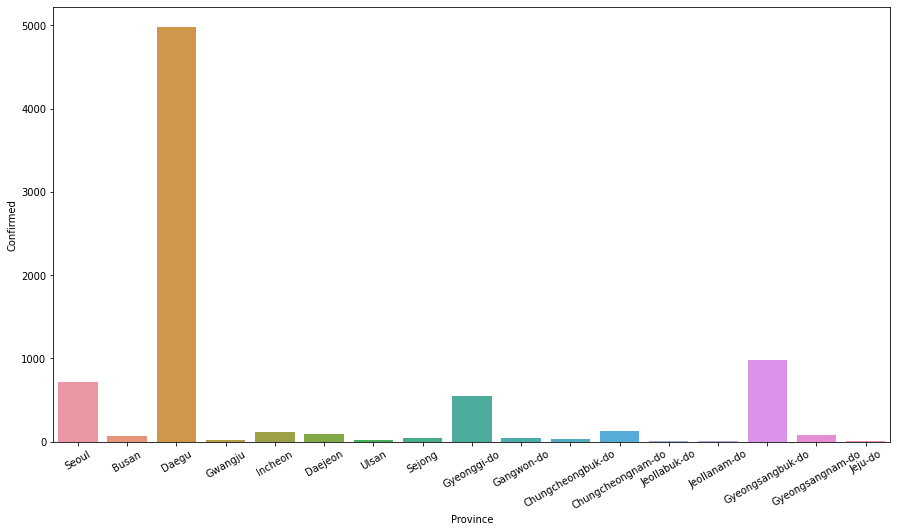

In [56]:
grid = plt.figure(figsize = (15,8))
grid = plt.xticks(rotation = 30)
grid = sns.barplot(data = group_infection, x='Province', y='Confirmed')
sig(plt.subplots)

2. 비집단감염 케이스만 모아서 데이터 프레임 새로 만듦

In [57]:
# notGroupCase는 그룹감염이 아닌 케이스들만 뽑은 데이터 프레임
# bigCase는 확진자수를 기준으로 내림차순으로 케이스를 정렬한 데이터 프레임 --> 확진자가 많은 케이스들을 보기 위한 것이었을 뿐 
bigCase2 = df_case.sort_values(by=['confirmed'], ascending=False)
notGroupCase = bigCase2[bigCase2.group == False]
notGroupCase.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
56,1200009,Daegu,-,False,contact with patient,917,-,-
57,1200010,Daegu,-,False,etc,747,-,-
109,2000020,Gyeonggi-do,-,False,overseas inflow,305,-,-
35,1000036,Seoul,-,False,overseas inflow,298,-,-
156,6000012,Gyeongsangbuk-do,-,False,contact with patient,190,-,-


In [58]:
# gcArray는 비 집단 감염 케이스명을 담아놓은 배열
ngcArray = notGroupCase.infection_case.unique()
ngcArray 

array(['contact with patient', 'etc', 'overseas inflow'], dtype=object)

In [59]:
# ngcProvince는 지역을 담아놓은 배열
ngcProvince = df_case.province.unique()
ngcProvince 

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [60]:
# ngcProvince에 있는 지역을 하나씩 트래버스 해서 그 지역과 같은 지역인 행들만 뽑아 데이터 프레임을 만든다. 
# 그리고 그 데이터 프레임에서 확진자 수를 뽑아서 sum에 더한다. 
# sum은 그 케이스의 누적 확진자 수가 되는 것!
# comfirmedList는 집단감염으로 감염된 누적 확진자 수를 집단별로 뽑은 것이다. 

comfirmedList2=[]
for f in ngcProvince  :
    c = notGroupCase[notGroupCase.province == f]
    sum = 0
    for i in c.confirmed:
        sum += i 
        pass #
    comfirmedList2.append(sum)
    print(f, " : ",sum)
    pass #


pp(comfirmedList2)
print(type(comfirmedList2))

Seoul  :  560
Busan  :  85
Daegu  :  1705
Gwangju  :  29
Incheon  :  85
Daejeon  :  45
Ulsan  :  35
Sejong  :  9
Gyeonggi-do  :  452
Gangwon-do  :  23
Chungcheongbuk-do  :  32
Chungcheongnam-do  :  30
Jeollabuk-do  :  17
Jeollanam-do  :  22
Gyeongsangbuk-do  :  345
Gyeongsangnam-do  :  52
Jeju-do  :  18
[560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]
<class 'list'>


In [61]:
# 위의 정보를 테이블로 만듦
notGroup_infection = pd.DataFrame(
    { 
    'Province' : ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
    'Confirmed':[560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]
    },
)
notGroup_infection 

,Province,Confirmed
0,Seoul,560
1,Busan,85
2,Daegu,1705
3,Gwangju,29
4,Incheon,85
5,Daejeon,45
6,Ulsan,35
7,Sejong,9
8,Gyeonggi-do,452
9,Gangwon-do,23


<Signature (nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

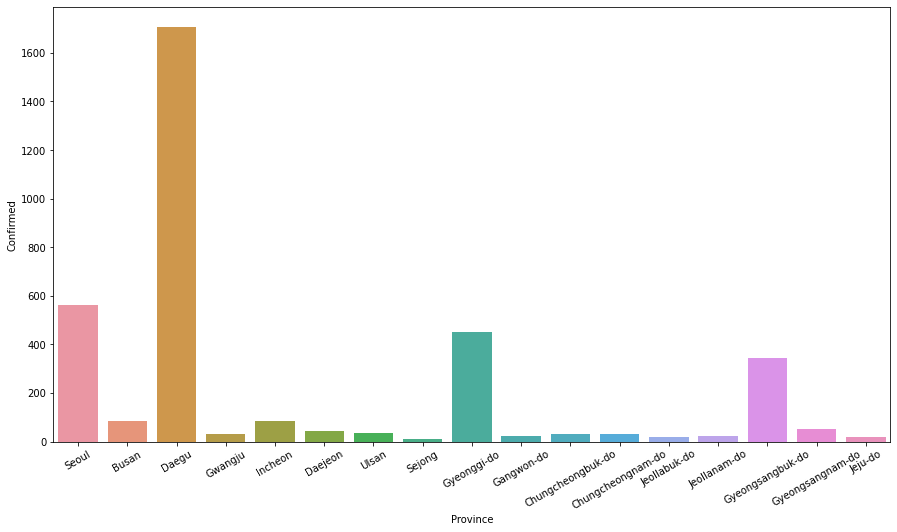

In [62]:
grid = plt.figure(figsize = (15,8))
grid = plt.xticks(rotation = 30)
grid = sns.barplot(data = notGroup_infection , x='Province', y='Confirmed')
sig(plt.subplots)

3. 1.과 2.를 이용해 bar plot을 만듦

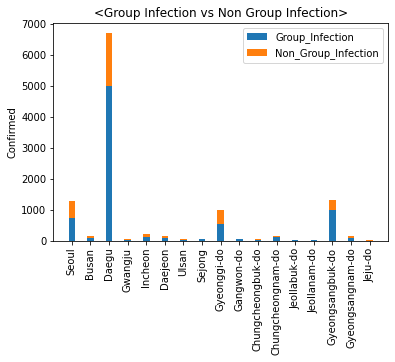

In [63]:
labels = ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
Group_Infection = [720, 71, 4975, 14, 117, 86, 16, 40, 548, 39, 28, 128, 6, 3, 979, 80, 1]
Non_Group_Infection = [560, 85, 1705, 29, 85, 45, 35, 9, 452, 23, 32, 30, 17, 22, 345, 52, 18]


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, grid = plt.subplots()
# grid.set_figure(15,8)
grid.bar(labels, Group_Infection, width,  label='Group_Infection')
grid.bar(labels, Non_Group_Infection, width, bottom=Group_Infection,
       label='Non_Group_Infection')
plt.xticks(rotation=90)
grid.set_ylabel('Confirmed')
grid.set_title('<Group Infection vs Non Group Infection>')
grid.legend()

plt.show()